# Understanding Support Vector Machines

## Relying on a computational method

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import scale

In [3]:
sns.set_style("whitegrid")

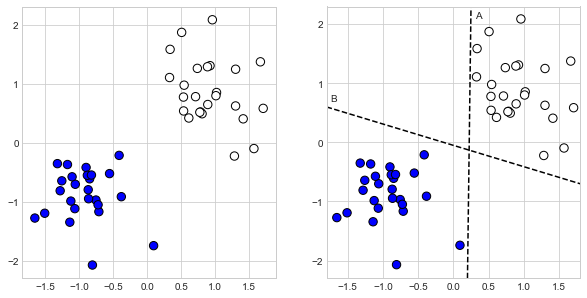

In [4]:
X, y = make_blobs(n_samples=50, 
                  centers=2, 
                  random_state=1, 
                  cluster_std=2.20)
X = scale(X)

colors = ['white' if i==0 else 'blue' for i in y]
x_max, y_max = np.max(np.abs(X[:, 0])), np.max(np.abs(X[:, 1]))
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1)
ax.scatter(X[:, 0], X[:, 1], 
                 edgecolor='black', 
                 facecolor=colors, s=70);
ax.xlim = (-x_max, +x_max)
ax.ylim = (-y_max, +y_max)

ax = plt.subplot(1, 2, 2)
ax.scatter(X[:, 0], X[:, 1], 
                 edgecolor='black', 
                 facecolor=colors, s=70);
ax.plot([0.20, 0.25],[-2.3, 2.3],'k--')
ax.text(0.30, 2.1, "A")
ax.plot([-1.80, 1.80],[0.6, -0.7],'k--')
ax.text(-1.75, 0.7, "B")
ax.xlim = (-x_max, + x_max)
ax.ylim = (-y_max, + y_max)
ax.margins(0)

In [5]:
def svc_decision_boundaries(svc):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    X, Y = np.meshgrid(x, y)
    D = np.vstack([X.ravel(), Y.ravel()]).T
    Z = svc.decision_function(D)
    
    ax.contour(X, Y, Z.reshape(X.shape), 
               colors=['gray', 'black', 'gray'],
               levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])
    
    ax.scatter(svc.support_vectors_[:, 0],
               svc.support_vectors_[:, 1],
               s=200, linewidth=1, 
               edgecolor='red',
               facecolors='none');

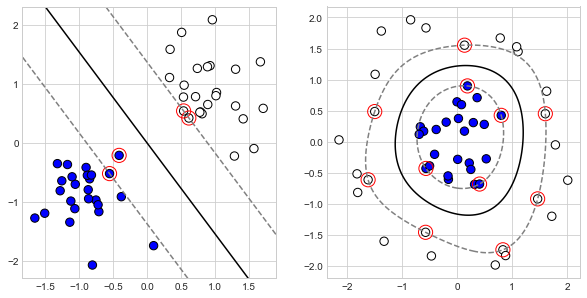

In [6]:
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1)
X, y = make_blobs(n_samples=50, 
                  centers=2, 
                  random_state=1, 
                  cluster_std=2.20)
X = scale(X)

colors = ['white' if i==0 else 'blue' for i in y]

from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

ax = plt.scatter(X[:, 0], X[:, 1], edgecolor='black', 
                 facecolor=colors, s=70);
svc_decision_boundaries(clf);

ax = plt.subplot(1, 2, 2)
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=50,
                    factor=.3, 
                    noise=.1,
                    random_state=1)

X = scale(X)

clf = SVC(kernel='rbf', C=10)
clf.fit(X, y)

colors = ['white' if i==0 else 'blue' for i in y]
ax = plt.scatter(X[:, 0], X[:, 1], edgecolor='black', 
                 facecolor=colors, s=70);

ax.xlim = (-x_max, + x_max)
ax.ylim = (-y_max, + y_max)

svc_decision_boundaries(clf);